# Using Boostrapping to evaluate your experiment

### Monthly talk on Taiwanese Data Professionals, 2021-02-24 Wed 
- Author: Szu-Min Yu, Data Scientist at CVS Health
- Goal:
This notebook will briefly demonstrate the process of boostrapping your data and evaluate the insterested metric (which is the conversion rate here).

In [1]:
#Import your packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
#Build the stimulated data for test and control
#Here I stimulate 1000 people from both groups with conversion rate in test as 2% and control as 1.5% 

test = np.random.choice(a = np.arange(0,2), size = 1000, p = [0.98 , 0.02])
control = np.random.choice(a = np.arange(0,2), size = 1000, p = [0.985, 0.015])

data = pd.DataFrame({'test': test, 'cntrl': control})
data.head()

,test,cntrl
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [8]:
def resampling(dataframe, i):
    
    '''
    This function is used for resampling.
    
    data: your dataset
    i: the number of iternation
    
    '''
    
    # 1.resample your data, replace will be True because boostrapping allows replacement

    df = dataframe.sample(frac = 1, replace = True)

    # 2. get the difference in conversion rate and the number of iteration
    df1 = df.mean().reset_index()
    df1.columns = ['group','value']
    df1 = df1.pivot_table(columns = ['group'])
    df1['diff'] = df1['test'] - df1['cntrl']
    df1['delta'] = df1['diff'] > 0
    
    return df1

In [9]:
# get all bootstrapped data

bootstrapped = pd.concat([resampling(dataframe = data, i = i) for i in range(0,5000)])
bootstrapped.index = np.arange(0, bootstrapped.shape[0])

bootstrapped.head()

group,cntrl,test,diff,delta
0,0.010,0.018,0.008,True
1,0.014,0.023,0.009,True
2,0.014,0.017,0.003,True
3,0.007,0.024,0.017,True
4,0.008,0.032,0.024,True


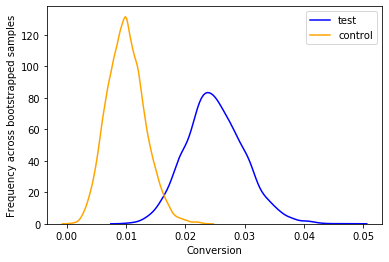

In [12]:
plt.figure()
ax = sns.distplot(bootstrapped['test'], label = 'test', hist = False, color = 'blue')
ax = sns.distplot(bootstrapped['cntrl'], label = 'control', hist = False, color = 'orange')
ax.set_ylabel('Frequency across bootstrapped samples')
ax.set_xlabel('Conversion')
plt.legend()
plt.show()

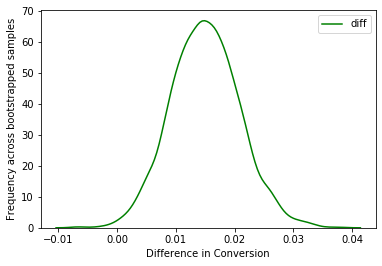

In [17]:
plt.figure()
ax = sns.distplot(bootstrapped['diff'], label = 'diff', hist = False, color = 'green')
ax.set_ylabel('Frequency across bootstrapped samples')
ax.set_xlabel('Difference in Conversion')
plt.legend()
plt.show()

In [11]:
# calculate p-value and confidence interval

p_value = 1 - bootstrapped['delta'].mean()

print('p-value: ', '{:0.5f}'.format(p_value))
if p_value < 0.05:
    print('Mean difference in conversion is significant at 0.05 level')
else: print('Mean difference in conversion is NOT significant at 0.05 level')

lower, upper = sm.stats.DescrStatsW(bootstrapped['diff']).tconfint_mean()
print('95% confidence interval', '[{:0.5f}, {:0.5f}]'.format(lower, upper))

p-value:  0.00500
Mean difference in conversion is significant at 0.05 level
95% confidence interval [0.01482, 0.01515]


#### Clean and compile all code into class

In [6]:
class bootstrapping:
    
    def resampling(self, dataframe, i):
        
        '''
        This function is used for resampling.

        dataframe: your dataset
        i: the number of iternation
        '''

        # 1.resample your data, replace will be True because boostrapping allows replacement

        df = dataframe.sample(frac = 1, replace = True)

        # 2. get the difference in conversion rate and the number of iteration
        df1 = df.mean().reset_index()
        df1.columns = ['group','value']
        df1 = df1.pivot_table(columns = ['group'])
        df1['diff'] = df1['test'] - df1['cntrl']
        df1['delta'] = df1['diff'] > 0

        return df1

    def measuring(self, data, iteration):
        
        # 3. get all bootstrapped data

        bootstrapped = pd.concat([self.resampling(dataframe = data, i = i) for i in range(0, iteration)])
        bootstrapped.index = np.arange(0, bootstrapped.shape[0])

        # plot test v. control
        plt.figure()
        ax = sns.distplot(bootstrapped['test'], label = 'test', hist = False, color = 'blue')
        ax = sns.distplot(bootstrapped['cntrl'], label = 'control', hist = False, color = 'orange')
        ax.set_ylabel('Frequency across bootstrapped samples')
        ax.set_xlabel('Conversion')
        plt.legend()
        plt.show()
        
        # plot the difference in conversion
        plt.figure()
        ax = sns.distplot(bootstrapped['diff'], label = 'diff', hist = False, color = 'green')
        ax.set_ylabel('Frequency across bootstrapped samples')
        ax.set_xlabel('Difference in Conversion')
        ax.
        plt.legend()
        plt.show()

        # 4. calculate p-value and confidence interval

        p_value = 1 - bootstrapped['delta'].mean()

        print('p-value: ', '{:0.5f}'.format(p_value))
        if p_value < 0.05:
            print('Mean difference in conversion is significant at 0.05 level')
        else: print('Mean difference in conversion is NOT significant at 0.05 level')

        lower, upper = sm.stats.DescrStatsW(bootstrapped['diff']).tconfint_mean()
        print('95% confidence interval', '[{:0.5f}, {:0.5f}]'.format(lower, upper))

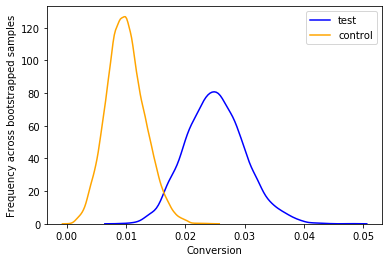

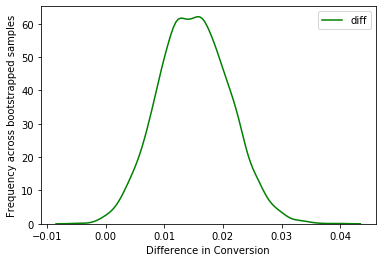

p-value:  0.00480
Mean difference in conversion is significant at 0.05 level
95% confidence interval [0.01492, 0.01525]


In [7]:
b = bootstrapping()
b.measuring(data, 5000)

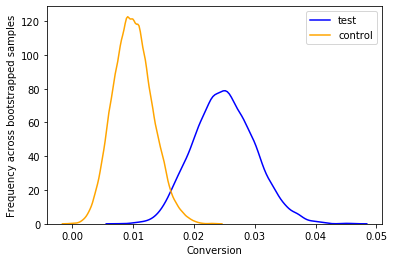

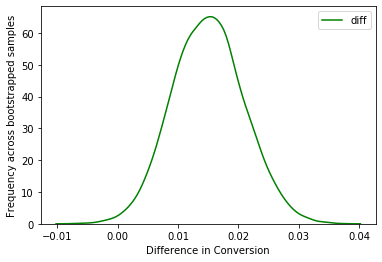

p-value:  0.00600
Mean difference in conversion is significant at 0.05 level
95% confidence interval [0.01485, 0.01513]


In [18]:
b = bootstrapping()
b.measuring(data, 7000)